In [8]:
#model comparision
import pandas as pd

results = pd.DataFrame([
    {
        "Model": "Logistic Regression",
        "Accuracy": 0.726,
        "Precision (Churn)": 0.491,
        "Recall (Churn)": 0.797,
        "F1 (Churn)": 0.608,
        "ROC-AUC": 0.835
    },
    {
        "Model": "XGBoost",
        "Accuracy": 0.783,
        "Precision (Churn)": 0.605,
        "Recall (Churn)": 0.532,
        "F1 (Churn)": 0.566,
        "ROC-AUC": 0.832
    },
    {
        "Model": "Random Forest",
        "Accuracy": 0.797,
        "Precision (Churn)": 0.642,
        "Recall (Churn)": 0.532,
        "F1 (Churn)": 0.582,
        "ROC-AUC": 0.841
    }
])

results


,Model,Accuracy,Precision (Churn),Recall (Churn),F1 (Churn),ROC-AUC
0,Logistic Regression,0.726,0.491,0.797,0.608,0.835
1,XGBoost,0.783,0.605,0.532,0.566,0.832
2,Random Forest,0.797,0.642,0.532,0.582,0.841


In [9]:
results.sort_values(by="ROC-AUC", ascending=False)


,Model,Accuracy,Precision (Churn),Recall (Churn),F1 (Churn),ROC-AUC
2,Random Forest,0.797,0.642,0.532,0.582,0.841
0,Logistic Regression,0.726,0.491,0.797,0.608,0.835
1,XGBoost,0.783,0.605,0.532,0.566,0.832


All three models show strong ranking ability. Random Forest achieves the highest ROC–AUC, indicating slightly better separation between churned and non-churned customers. However, the differences are small, suggesting all models learn similar risk ordering.

In [10]:
results.sort_values(by="Recall (Churn)", ascending=False)

,Model,Accuracy,Precision (Churn),Recall (Churn),F1 (Churn),ROC-AUC
0,Logistic Regression,0.726,0.491,0.797,0.608,0.835
1,XGBoost,0.783,0.605,0.532,0.566,0.832
2,Random Forest,0.797,0.642,0.532,0.582,0.841


Logistic Regression significantly outperforms tree-based models in recall, identifying nearly 80% of churned customers. This makes it the most suitable model for proactive churn prevention, where missing a churner is more costly than contacting a non-churner.

In [11]:
results.sort_values(by="Precision (Churn)", ascending=False)

,Model,Accuracy,Precision (Churn),Recall (Churn),F1 (Churn),ROC-AUC
2,Random Forest,0.797,0.642,0.532,0.582,0.841
1,XGBoost,0.783,0.605,0.532,0.566,0.832
0,Logistic Regression,0.726,0.491,0.797,0.608,0.835


Tree-based models are more conservative, achieving higher precision but at the cost of recall. They reduce false positives but miss a larger fraction of churners.

<Axes: xlabel='Model'>

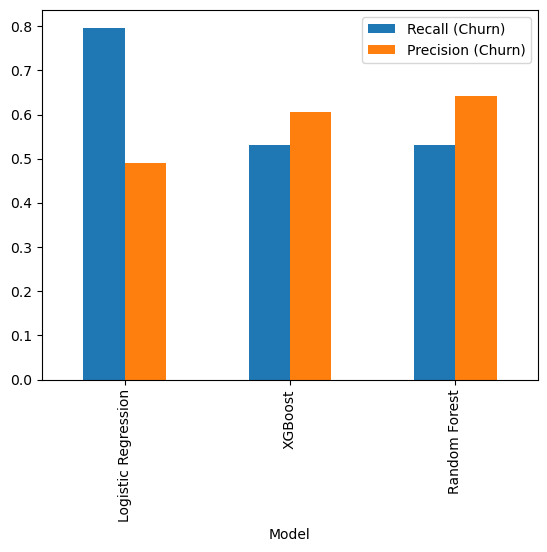

In [12]:
results.set_index("Model")[["Recall (Churn)", "Precision (Churn)"]].plot(kind="bar")


<Axes: xlabel='Model'>

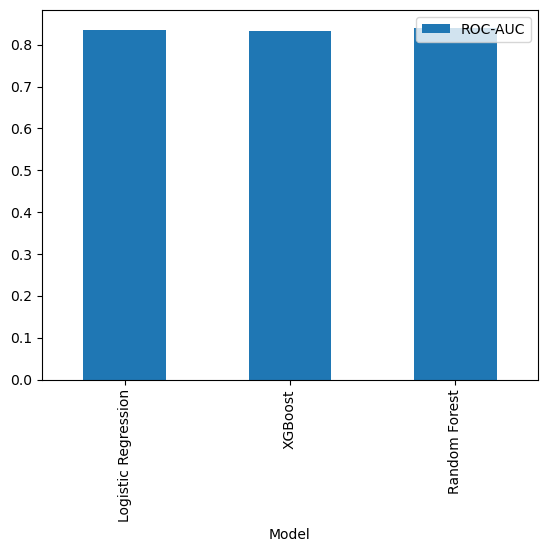

In [13]:
results.set_index("Model")[["ROC-AUC"]].plot(kind="bar")


While Random Forest achieves the highest ROC–AUC and overall accuracy, Logistic Regression demonstrates substantially higher recall for churned customers. Given the business objective of minimizing missed churners, Logistic Regression is selected as the final model for deployment.

Tree-based models are retained as comparative benchmarks and for deeper explainability analysis using SHAP.